In [10]:
import os
os.getcwd()
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns

survey = pd.read_excel("survey.xlsx")
survey=survey[survey['included']==1]

In [11]:
columns_to_check_time = [
       'time spend on all social media apps actual', 'Instagram actual',
       'TikTok actual', 'FB actual', 'whatsApp actual', 'LinkedIn actual',
       'Twitter actual', 'Youtube actual', 'Snapchat actual', 'Threads actual',
       'Pinterest actual', 'other actual']

# Calculate Z-score for the selected columns
z_scores_time = np.abs(stats.zscore(survey[columns_to_check_time]))

# Define a threshold for outliers (e.g., z-score > 3)
threshold = 3

# Create a mask to filter out rows with outliers in any of the selected columns
outlier_mask_time = (z_scores_time > threshold).any(axis=1)

# Filter out rows with outliers
df_cleaned = survey[~outlier_mask_time]
df_cleaned = df_cleaned.reset_index(drop=True)

# Initialize the 'outliers' column to 0
survey['outliers'] = 0

# Update the 'outliers' column in the original DataFrame based on the filtered DataFrame's outlier_mask
survey.loc[survey.index, 'outliers'] = np.where(outlier_mask_time, 1, 0)

# print the number of outliers detected
num_outliers = outlier_mask_time.sum()
print(f'Number of outliers detected: {num_outliers}')

# Display the DataFrame to verify
print(survey.head())

Number of outliers detected: 76
   included   IDkoda  not equal            t_insert              t_edit  \
5         1  487grfa          0 2024-05-29 10:13:01 2024-05-29 10:21:04   
6         1  731gkam          0 2024-05-29 10:13:02 2024-05-29 10:20:05   
7         1   705fml          0 2024-05-29 10:13:03 2024-05-29 10:22:24   
8         1  67bemf5          0 2024-05-29 10:13:04 2024-05-29 10:22:02   
9         1  001mgan          1 2024-05-29 10:13:05 2024-05-29 10:23:43   

   status  SEX  AGE   Q2   Q3  ...  FB actual  whatsApp actual  \
5       6    2   23  0.0  0.0  ...         23                0   
6       6    2   22  0.0  0.0  ...          0                0   
7       6    2   22  0.0  0.0  ...         21                0   
8       6    1   22  0.0  0.0  ...         57                0   
9       6    2   22  0.0  0.0  ...         26                4   

   LinkedIn actual  Twitter actual  Youtube actual  Snapchat actual  \
5                0               0               

In [12]:
df_cleaned_time = survey #before outliers out 
# Display the summary of the data
print(df_cleaned_time.describe())


       included   not equal                       t_insert  \
count     448.0  448.000000                            448   
mean        1.0    0.437500  2024-05-30 22:11:29.698660864   
min         1.0    0.000000            2024-05-29 10:13:01   
25%         1.0    0.000000            2024-05-29 17:38:10   
50%         1.0    0.000000     2024-05-30 12:20:24.500000   
75%         1.0    1.000000            2024-05-30 17:26:41   
max         1.0    1.000000            2024-06-14 09:44:48   
std         0.0    0.496633                            NaN   

                              t_edit  status         SEX         AGE  \
count                            448   448.0  448.000000  448.000000   
mean   2024-05-31 00:20:03.939732224     6.0    1.618304   21.558036   
min              2024-05-29 10:19:21     6.0    1.000000   20.000000   
25%              2024-05-29 17:46:25     6.0    1.000000   21.000000   
50%              2024-05-30 17:31:20     6.0    2.000000   21.000000   
75%    20

In [13]:
# Define the lottery columns and include GENDER
lotteries_columns = list(df_cleaned_time.columns[8:18])
lotteries_columns.append('SEX')

# Filter the DataFrame to include only the relevant columns ( now already in binary form)
risk_taking_data_binary = df_cleaned_time[lotteries_columns]

# Prepare results list
results_list = []

# Loop through each lottery column (excluding GENDER)
for column in lotteries_columns[:-1]:
    # Separate data by gender and also analyze combined data
    for gender in [1, 2, 'all']:  # 1 is male, 2 is female, 'all' is combined
        if gender == 'all':
            gender_data = risk_taking_data_binary
            gender_label = 'Total'
        else:
            gender_data = risk_taking_data_binary[risk_taking_data_binary['SEX'] == gender]
            gender_label = 'Male' if gender == 1 else 'Female'
        
        # Count decisions for each option
        counts = gender_data[column].value_counts().sort_index()
        
        # Ensure both counts have safe and risky categories
        counts = counts.reindex([0, 1], fill_value=0)
        
        # Store results
        results_list.append({
            'Lottery': column,
            'Gender': gender_label,
            'Safe (Count)': counts.get(0, 0),
            'Risky (Count)': counts.get(1, 0),
            'Total Count': counts.sum()
        })

# Convert results list to DataFrame
results_df = pd.DataFrame(results_list)

# Display results table
print(results_df)
results_df.to_excel('table_lotteries.xlsx', index=False)


   Lottery  Gender  Safe (Count)  Risky (Count)  Total Count
0       Q2    Male           134             37          171
1       Q2  Female           242             35          277
2       Q2   Total           376             72          448
3       Q3    Male           147             24          171
4       Q3  Female           245             32          277
5       Q3   Total           392             56          448
6       Q4    Male            25            146          171
7       Q4  Female            64            213          277
8       Q4   Total            89            359          448
9       Q5    Male            47            124          171
10      Q5  Female           109            168          277
11      Q5   Total           156            292          448
12    Q9_2    Male            24             62           86
13    Q9_2  Female            32            101          133
14    Q9_2   Total            56            163          219
15      Q6    Male      

In [ ]:
names = ['Problem 3', 'Problem 4', 'Problem 7', 'Problem 8', 'Loss domain', 'Gain domain','Gain domain','Loss domain','Gain domain','Loss domain'] 

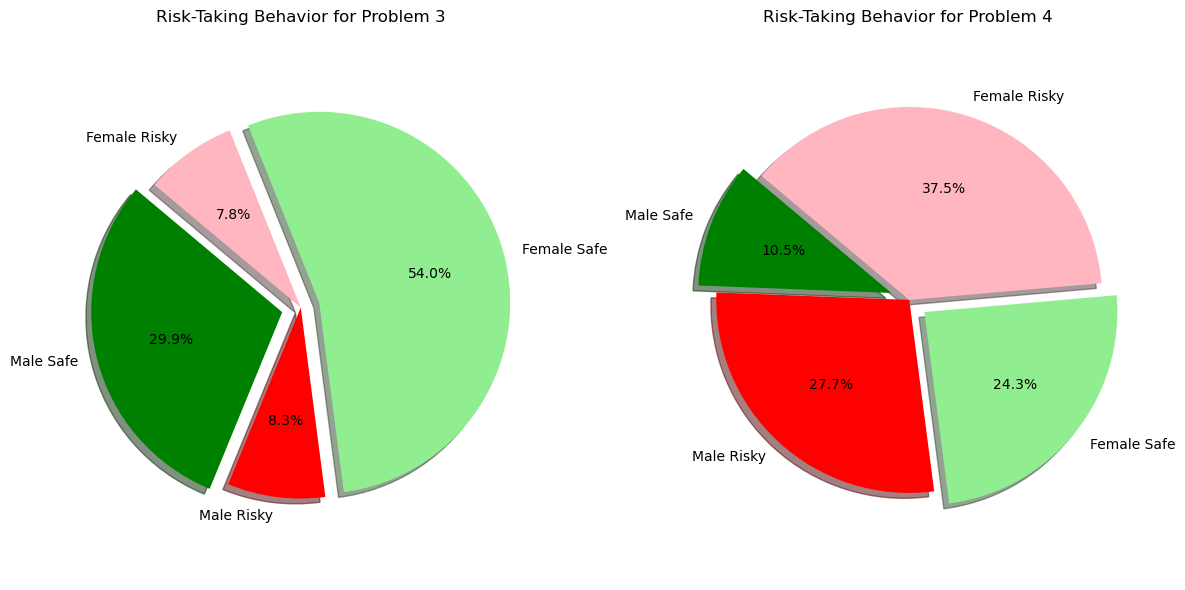

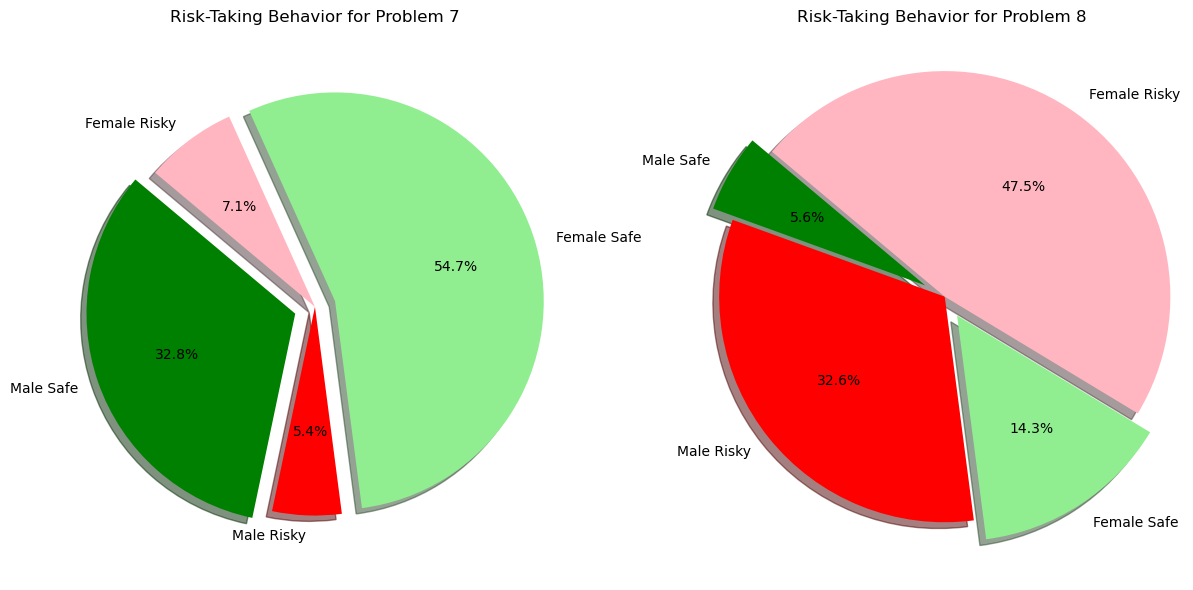

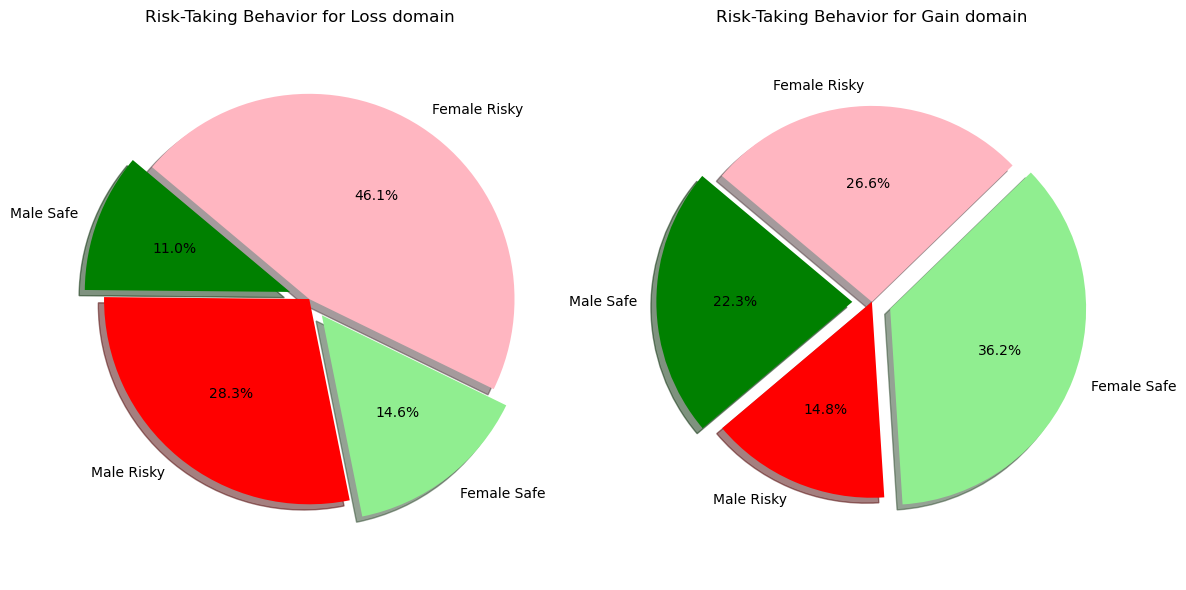

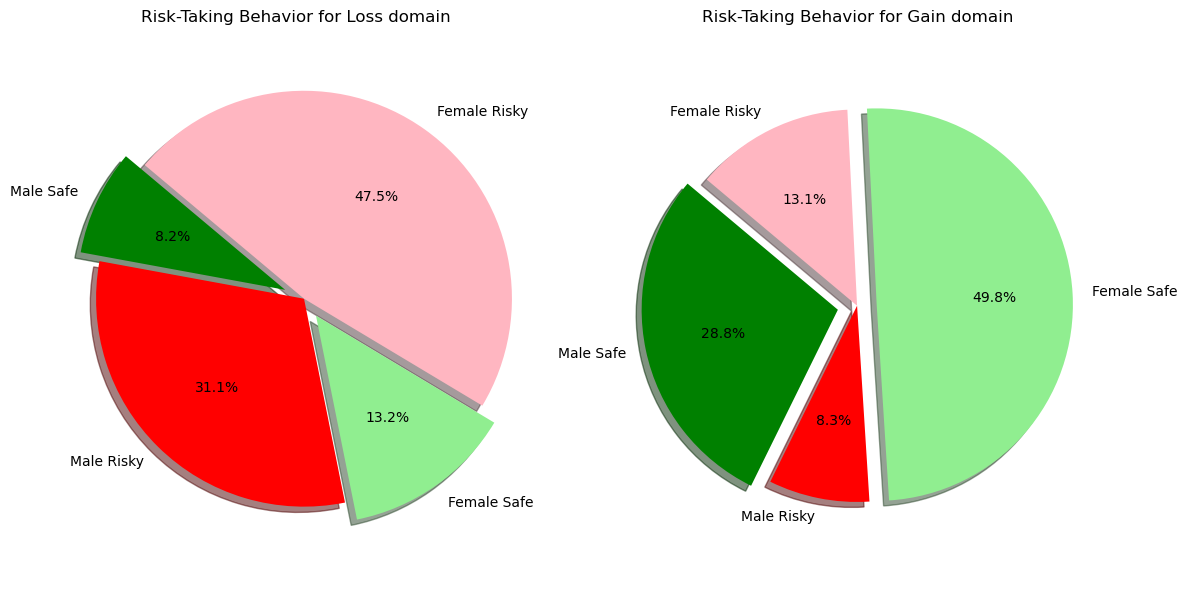

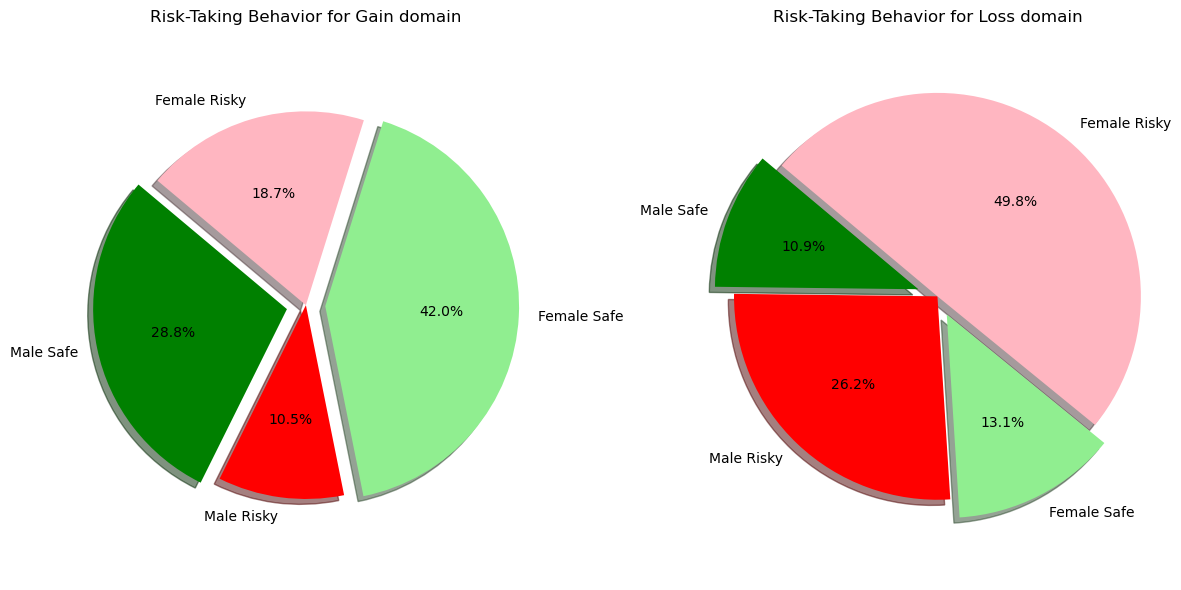

In [35]:
# Define pairs for plotting
pairs = [('Q2', 'Q5'), ('Q3', 'Q4'), ('Q9_2', 'Q6'), ('Q8', 'Q9'), ('Q7a', 'Q7b')]

# Define descriptive names for each column
column_to_name = {
    'Q2': 'Problem 3',
    'Q5': 'Problem 4',
    'Q3': 'Problem 7',
    'Q4': 'Problem 8',
    'Q9_2': 'Loss domain',
    'Q6': 'Gain domain',
    'Q8': 'Loss domain',
    'Q9': 'Gain domain',
    'Q7a': 'Gain domain',
    'Q7b': 'Loss domain'
}


# Loop through each pair of lottery columns and create pie charts
for pair in pairs:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a subplot with 1 row and 2 columns
    for i, column in enumerate(pair):
# Prepare the data for the pie chart
        pie_data = {
        'Male Safe': risk_taking_data_binary[(risk_taking_data_binary['SEX'] == 1) & (risk_taking_data_binary[column] == 0)].shape[0],
        'Male Risky': risk_taking_data_binary[(risk_taking_data_binary['SEX'] == 1) & (risk_taking_data_binary[column] == 1)].shape[0],
        'Female Safe': risk_taking_data_binary[(risk_taking_data_binary['SEX'] == 2) & (risk_taking_data_binary[column] == 0)].shape[0],
        'Female Risky': risk_taking_data_binary[(risk_taking_data_binary['SEX'] == 2) & (risk_taking_data_binary[column] == 1)].shape[0]
    }

        # Create the pie chart
        labels = pie_data.keys()
        sizes = pie_data.values()
        colors = ['green', 'red', 'lightgreen', 'lightpink']
        explode = (0.1, 0, 0.1, 0)  # explode Male Safe and Female Safe for better visualization

        # Get the descriptive name for the current column
        descriptive_name = column_to_name[column]

        axes[i].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
                    shadow=True, startangle=140)
        axes[i].set_title(f'Risk-Taking Behavior for {descriptive_name}')
        axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.tight_layout()
    plt.show()

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [16]:
# Define lottery pairs for gain and loss domains
lottery_pairs = {
    'Q9_2': 'Q6',
    'Q8': 'Q9',
    'Q7a': 'Q7b'
}

# Prepare data for t-tests and conduct the tests, we do not care for t-test that q7 is reverse
t_test_results = {}
for loss_col, gain_col in lottery_pairs.items():
    loss_data = risk_taking_data_binary[loss_col].dropna()
    gain_data = risk_taking_data_binary[gain_col].dropna()
    
    t_stat, p_value = stats.ttest_ind(loss_data, gain_data)
    
    t_test_results[(loss_col, gain_col)] = (t_stat, p_value)

t_test_results


{('Q9_2', 'Q6'): (7.463835179251984, 4.4440962481390875e-13),
 ('Q8', 'Q9'): (14.701157737066769, 3.5511291711342284e-40),
 ('Q7a', 'Q7b'): (-11.195778956309507, 8.246788750411521e-26)}

In [24]:
from scipy.stats import chi2_contingency
# Define the pairs and their respective domains
pairs = {
    ('Q9_2', 'Q6'): ('loss', 'gain'),
    ('Q8', 'Q9'): ('loss', 'gain'),
    ('Q7a', 'Q7b'): ('loss', 'gain')
}


results = {}
# Function to perform chi-squared test and return the result
def chi_squared_test(counts1, counts2):
    # Create contingency table
    contingency_table = pd.DataFrame([counts1, counts2], columns=['safe', 'risky'])
    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p, dof, expected

# Separate and aggregate responses for each pair
for (col1, col2), (domain1, domain2) in pairs.items():
    df_loss = risk_taking_data_binary[col1].dropna().value_counts().sort_index()
    df_gain = risk_taking_data_binary[col2].dropna().value_counts().sort_index()
    
    # Ensure both counts have safe and risky categories
    df_loss = df_loss.reindex([0, 1], fill_value=0)
    df_gain = df_gain.reindex([0, 1], fill_value=0)
    
    counts_loss = df_loss.values
    counts_gain = df_gain.values
    
    if counts_loss.sum() > 0 and counts_gain.sum() > 0:
        chi2, p, dof, expected = chi_squared_test(counts_loss, counts_gain)
        results[(col1, col2)] = {
            'chi2': chi2,
            'p-value': p,
            'degrees_of_freedom': dof,
            'expected_frequencies': expected
        }
    else:
        results[(col1, col2)] = 'Not enough data for chi-squared test'

# Print results
for pair, result in results.items():
    print(f"Pair: {pair}, Result: {result}")

Pair: ('Q9_2', 'Q6'), Result: {'chi2': 48.40539147946194, 'p-value': 3.466139240178538e-12, 'degrees_of_freedom': 1, 'expected_frequencies': array([[ 92.87946429, 126.12053571],
       [ 97.12053571, 131.87946429]])}
Pair: ('Q8', 'Q9'), Result: {'chi2': 143.9546361015706, 'p-value': 3.635038197978413e-33, 'degrees_of_freedom': 1, 'expected_frequencies': array([[110.96651786, 108.03348214],
       [116.03348214, 112.96651786]])}
Pair: ('Q7a', 'Q7b'), Result: {'chi2': 96.41642146599622, 'p-value': 9.30918187189442e-23, 'degrees_of_freedom': 1, 'expected_frequencies': array([[102.65625, 116.34375],
       [107.34375, 121.65625]])}


In [26]:
# Create combined DataFrame
results_combined = []

for pair, chi2_result in results.items():
    t_stat, p_value = t_test_results.get(pair, (np.nan, np.nan))
    
    if chi2_result == 'Not enough data for chi-squared test':
        row = {
            'Pair': pair,
            'Chi-squared': 'Not enough data',
            'P-value (Chi-squared)': 'Not enough data',
            'Degrees of Freedom': 'Not enough data',
            'T-statistic': t_stat,
            'P-value (T-test)': p_value
        }
    else:
        row = {
            'Pair': pair,
            'Chi-squared': chi2_result['chi2'],
            'P-value (Chi-squared)': chi2_result['p-value'],
            'Degrees of Freedom': chi2_result['degrees_of_freedom'],
            'T-statistic': t_stat,
            'P-value (T-test)': p_value
        }
    
    results_combined.append(row)

# Convert to DataFrame
results_df = pd.DataFrame(results_combined)

# Print the combined results DataFrame
print("Combined Test Results:")
print(results_df)
results_df.to_excel('results_df.xlsx', index=False)

Combined Test Results:
         Pair  Chi-squared  P-value (Chi-squared)  Degrees of Freedom  \
0  (Q9_2, Q6)    48.405391           3.466139e-12                   1   
1    (Q8, Q9)   143.954636           3.635038e-33                   1   
2  (Q7a, Q7b)    96.416421           9.309182e-23                   1   

   T-statistic  P-value (T-test)  
0     7.463835      4.444096e-13  
1    14.701158      3.551129e-40  
2   -11.195779      8.246789e-26  


In [276]:
# Analyze social media usage

sm_columns = ['Perception of time on all social media',
       'Other social media', 'Instagram perception', 'TikTok perception',
       'FB perception', 'whatsApp perception', 'LinkedIn perception',
       'Twitter perception', 'Youtube perception', 'Snapchat perception',
       'Threads perception', 'Pinterest perception', 'other perception',
       'time spend on all social media apps actual', 'Instagram actual',
       'TikTok actual', 'FB actual', 'whatsApp actual', 'LinkedIn actual',
       'Twitter actual', 'Youtube actual', 'Snapchat actual', 'Threads actual',
       'Pinterest actual', 'other actual']
sm_data = df_cleaned_time[sm_columns]

/var/folders/jh/x3pzkf253nz6__d6tfg4p4200000gn/T/ipykernel_80318/552996059.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_data['Perception of time on all social media']=sm_data['Perception of time on all social media']


5      300
6      180
7      180
8      120
9      300
      ... 
622    180
623    240
624    360
626    240
627    300
Name: Perception of time on all social media, Length: 448, dtype: int64

In [277]:
# Export the DataFrame to an Excel file
#sm_data.to_excel('sm_data.xlsx', index=False)

In [299]:
# Replace 0 values with NaN, so the values 0 are not taken into the account when calculating the means
sm_data.replace(0, np.nan, inplace=True)

# Calculate statistics ignoring NaN
statistics = sm_data.describe()

# Create new columns for the differences
sm_data['difference_all_social_media'] = sm_data['Perception of time on all social media'] - sm_data['time spend on all social media apps actual']

social_media = ["Instagram", "TikTok", "FB", "whatsApp", "LinkedIn", "Twitter", "Youtube", "Snapchat", "Threads", "Pinterest", "other"]
for media in social_media:
    perception_col = f"{media} perception"
    actual_col = f"{media} actual"
    if perception_col in sm_data.columns and actual_col in sm_data.columns:
        difference_col = f"difference_{media}"
        sm_data[difference_col] = sm_data[perception_col] - sm_data[actual_col]

# Display the statistics
print("\nStatistics (ignoring NaN):")
print(statistics)
print((sm_data['Perception of time on all social media']).describe())
print((sm_data['time spend on all social media apps actual']).describe())


Statistics (ignoring NaN):
       Perception of time on all social media  Other social media  \
count                              448.000000          104.000000   
mean                               258.348214           23.201923   
std                                 80.022056           15.076105   
min                                 60.000000            1.000000   
25%                                180.000000           10.000000   
50%                                240.000000           21.000000   
75%                                300.000000           32.500000   
max                                420.000000           56.000000   

       Instagram perception  TikTok perception  FB perception  \
count            416.000000         264.000000     275.000000   
mean              97.911058          99.965909      34.854545   
std              107.812462         123.128248      46.213807   
min                4.000000           2.000000       1.000000   
25%               60.0000

/var/folders/jh/x3pzkf253nz6__d6tfg4p4200000gn/T/ipykernel_80318/1152921165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_data.replace(0, np.nan, inplace=True)
/var/folders/jh/x3pzkf253nz6__d6tfg4p4200000gn/T/ipykernel_80318/1152921165.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_data['difference_all_social_media'] = sm_data['Perception of time on all social media'] - sm_data['time spend on all social media apps actual']
/var/folders/jh/x3pzkf253nz6__d6tfg4p4200000gn/T/ipykernel_80318/1152921165.py:16: SettingWithCopyWarning: 
A value is trying

In [279]:
#data2 = sm_data[['Perception of time on all social media','time spend on all social media apps actual']]
#statistics_table= data2.describe()

#excel_file = 'statistics_table.xlsx'
#statistics_table.to_excel(excel_file, index=True)

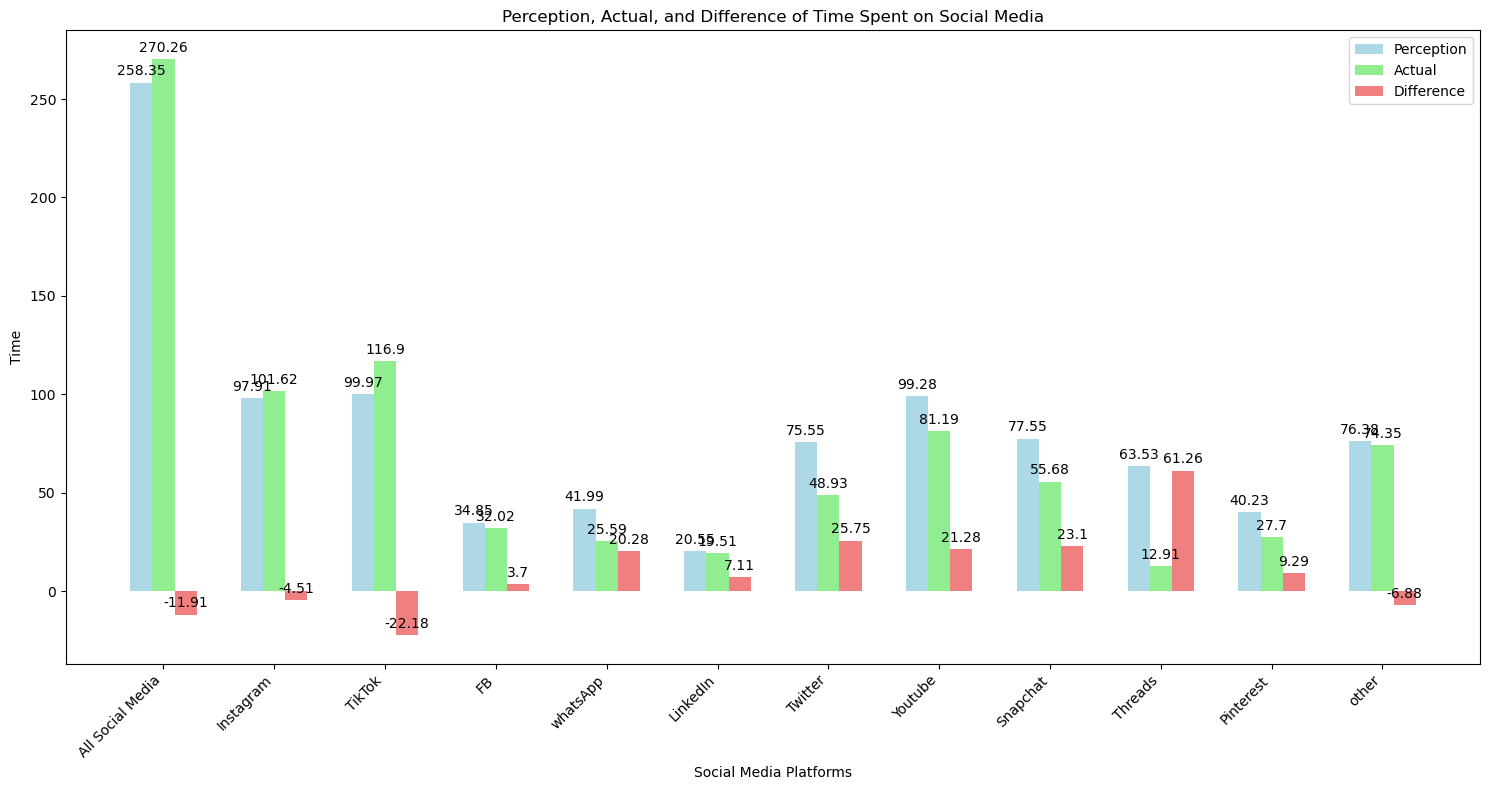

In [280]:
# Plotting


labels = ['All Social Media'] + social_media
perception_values = [sm_data['Perception of time on all social media'].mean()] + [sm_data[f"{media} perception"].mean() for media in social_media]
actual_values = [sm_data['time spend on all social media apps actual'].mean()] + [sm_data[f"{media} actual"].mean() for media in social_media]
difference_values = [sm_data['difference_all_social_media'].mean()] + [sm_data[f"difference_{media}"].mean() for media in social_media]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width, perception_values, width, label='Perception', color='lightblue')
rects2 = ax.bar(x, actual_values, width, label='Actual', color='lightgreen')
rects3 = ax.bar(x + width, difference_values, width, label='Difference', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Social Media Platforms')
ax.set_ylabel('Time')
ax.set_title('Perception, Actual, and Difference of Time Spent on Social Media')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [281]:
correlation = sm_data[['Perception of time on all social media', 'time spend on all social media apps actual']].corr()
correlation

,Perception of time on all social media,time spend on all social media apps actual
Perception of time on all social media,1.000000,0.593307
time spend on all social media apps actual,0.593307,1.000000


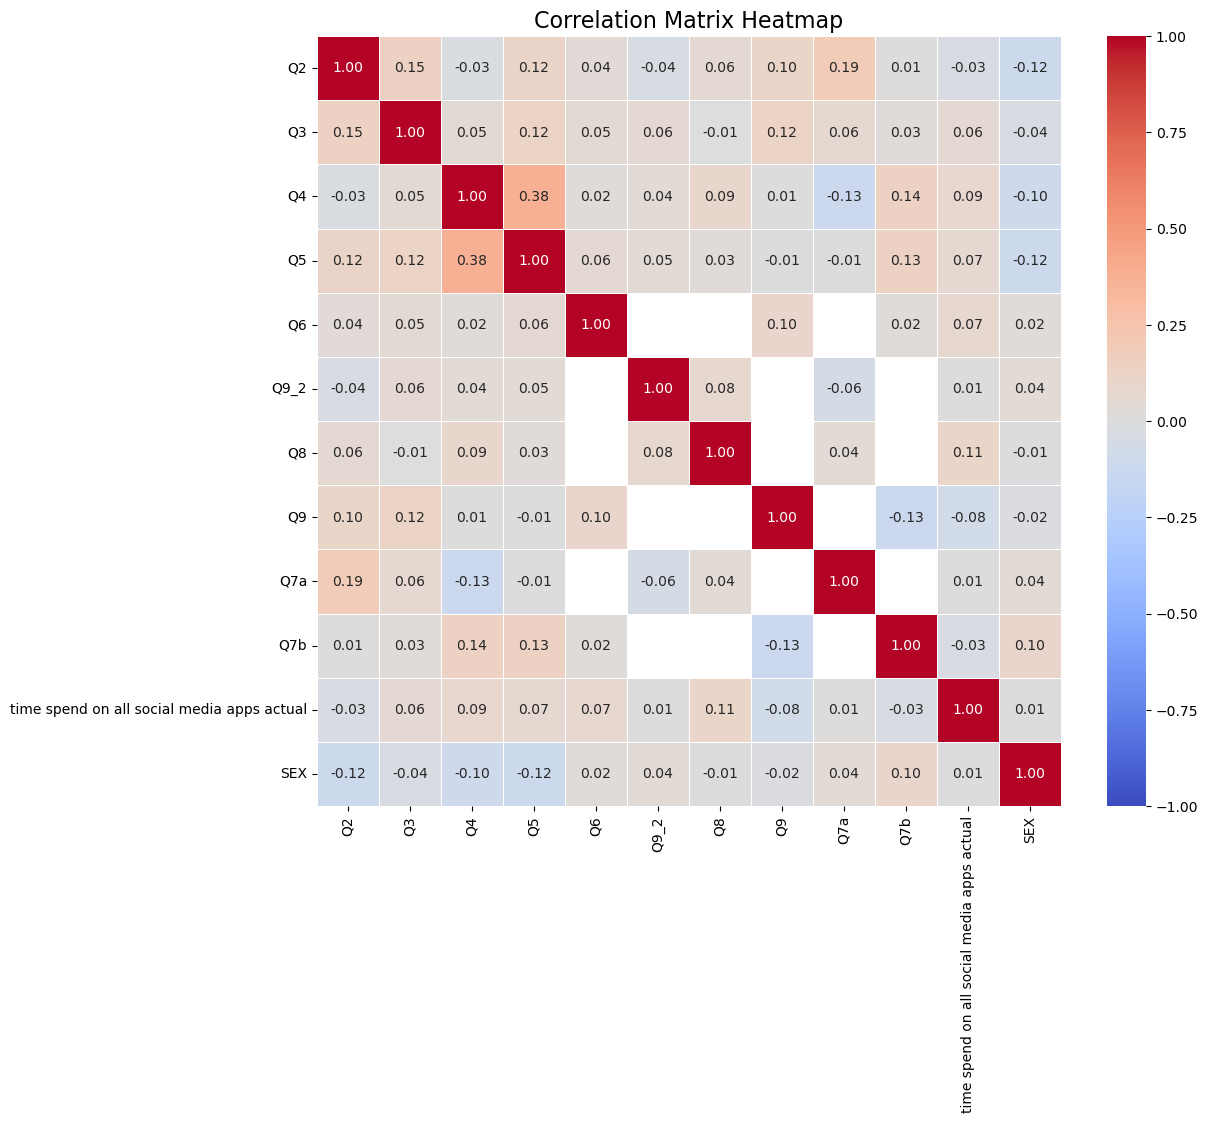

In [282]:

correlation = survey[['Q2','Q3','Q4','Q5','Q6','Q9_2','Q8','Q9','Q7a','Q7b' ,'time spend on all social media apps actual','SEX']].corr()
correlation

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Set plot title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

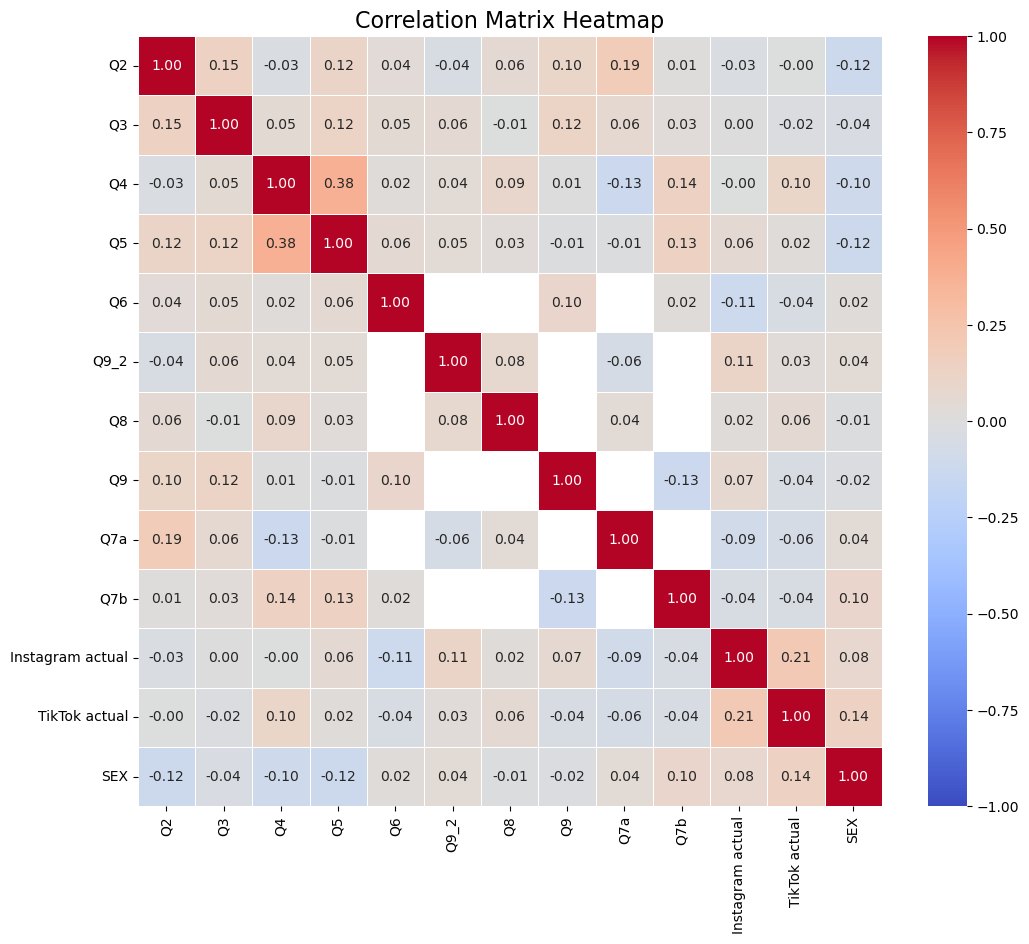

In [7]:
correlation2 = survey[['Q2','Q3','Q4','Q5','Q6','Q9_2','Q8','Q9','Q7a','Q7b' ,'Instagram actual','TikTok actual','SEX']].corr()
correlation2

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Set plot title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()